In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from celluloid import Camera

In [2]:
def makeGrid(size,padding=True):
    np.random.seed(42)
    grid = np.random.rand(size,size)
    if padding:
        background = np.ones((size+2,size+2))
        background[1:-1,1:-1] = grid
        return background
    return grid

def checkNeighbours(grid,pos,domain,visited):
    i,j = pos
    neighbours = [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]
    for n in neighbours:
        if grid[n] and n not in visited:
            domain.add(n)
            visited.add(n)
            _domain,_visited = checkNeighbours(grid,n,domain,visited)
            domain=domain.union(_domain)
            visited=visited.union(_visited)
        else:
            visited.add(n)
            
    return domain,visited
            

In [3]:
def getDomains(grid,p):
    boolean_grid = grid < p
    dic = {}
    index = 0
    visited = set()
    for i,_ in enumerate(boolean_grid):
        for j,_ in enumerate(boolean_grid[i]):
            if boolean_grid[i,j] and (i,j) not in visited:
                dic[index],_visited = checkNeighbours(boolean_grid,(i,j),
                                             domain=set([(i,j)]),visited=visited)
                visited = visited.union(_visited)
                index+=1
    return dic

In [18]:
ps = np.arange(0.1,1.1,0.01)
results = {}
grid = makeGrid(100)

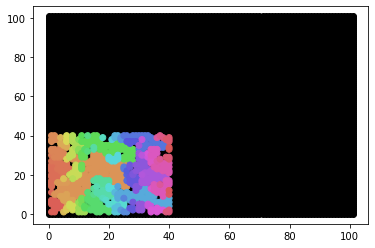

In [25]:
#domains = results[0.1]
colors = sns.color_palette("hls",n_colors=len(domains))
x = np.arange(size+2)
X,Y = np.meshgrid(x,x)
plt.scatter(X,Y,c="black")
colors = np.concatenate([[colors[d]]*len(domains[d]) for d in domains])
xx = np.concatenate([list(domains[d]) for d in domains])
plt.scatter(xx[:,0],xx[:,1],c=colors)

In [32]:
size = 100
ps = np.arange(0.1,1.1,0.01)
grid = makeGrid(100)
fig = plt.figure()
camera = Camera(fig)
for p in results.keys():
    domains = results[p]
    plt.legend([f'P-værdi: {round(p,3)}'],loc="lower left")
    colors = sns.color_palette("hls",n_colors=len(domains))
    x = np.arange(size+2)
    X,Y = np.meshgrid(x,x)
    plt.scatter(X,Y,c="black")
    colors = np.concatenate([[colors[d]]*len(domains[d]) for d in domains])
    xx = np.concatenate([list(domains[d]) for d in domains])
    plt.scatter(xx[:,0],xx[:,1],c=colors)
    camera.snap()
animation = camera.animate()
animation.save("percolation.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

In [33]:
results

{}

In [31]:
size = 100
ps = np.arange(0.1,1.1,0.01)
grid = makeGrid(100)
fig = plt.figure()
domains = results[0.01]
colors = sns.color_palette("hls",n_colors=len(domains))
x = np.arange(size+2)
X,Y = np.meshgrid(x,x)
plt.scatter(X,Y,c="black")
colors = np.concatenate([[colors[d]]*len(domains[d]) for d in domains])
xx = np.concatenate([list(domains[d]) for d in domains])
plt.scatter(xx[:,0],xx[:,1],c=colors)

KeyError: 0.01

<Figure size 432x288 with 0 Axes>

In [28]:
xx = np.concatenate([list(domains[d]) for d in domains])
np.concatenate([[colors[d]]*len(domains[d]) for d in domains])
xx

array([[ 2,  1],
       [ 3,  4],
       [ 4,  3],
       ...,
       [40, 12],
       [40, 33],
       [40, 34]])

In [29]:
x[np.array(list(domains[0]))[:,0]]

array([2, 3, 4, 1, 2, 4, 2, 1, 2, 3, 4, 5, 1, 2, 4, 3, 1, 3])

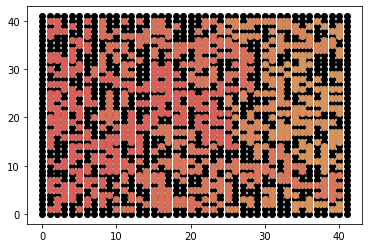

In [30]:
size = 40
p = 0.5
grid = makeGrid(size)
domains = getDomains(grid,p)



x = np.arange(size+2)
X,Y = np.meshgrid(x,x)
plt.scatter(X,Y,c="black")

for k,d in enumerate(domains):
    for i in domains[d]:
        plt.scatter(i[0],i[1],color=colors[k]);
        

In [103]:
colors[0]

(0.86, 0.3712, 0.33999999999999997)